In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train,_),(x_test, _) = mnist.load_data()             # Here, target variable is not needed. so, y_train and y_test are not needed.

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [4]:
model = Sequential()
model.add(Input(shape=(784,))) # Input
model.add(Dense(350, activation="relu")) # Hidden Layer
model.add(Dense(100, activation="relu")) # Code
model.add(Dense(350, activation="relu")) # Hidden Layer
model.add(Dense(784)) # Output

In [5]:
model.compile(optimizer="adam",
              loss="mean_squared_error")

In [6]:
model.fit(x=x_train,
          y=x_train,
          epochs=50,
          batch_size=1000,
          validation_data = (x_test, x_test))                 # Here, y=x_train , because we pass the x_train as image and predict the same x_train as
                                                              # image as output.

Epoch 1/50
60/60 [==============================] - 8s 109ms/step - loss: 3697.3562 - val_loss: 2207.3513
Epoch 2/50
60/60 [==============================] - 5s 83ms/step - loss: 1692.2622 - val_loss: 1309.3824
Epoch 3/50
60/60 [==============================] - 6s 104ms/step - loss: 1169.9261 - val_loss: 1006.3276
Epoch 4/50
60/60 [==============================] - 5s 84ms/step - loss: 964.9945 - val_loss: 911.4162
Epoch 5/50
60/60 [==============================] - 5s 83ms/step - loss: 864.8326 - val_loss: 804.4543
Epoch 6/50
60/60 [==============================] - 6s 105ms/step - loss: 801.9321 - val_loss: 801.4982
Epoch 7/50
60/60 [==============================] - 5s 82ms/step - loss: 761.4444 - val_loss: 736.8458
Epoch 8/50
60/60 [==============================] - 6s 105ms/step - loss: 728.5352 - val_loss: 698.1260
Epoch 9/50
60/60 [==============================] - 5s 84ms/step - loss: 703.9148 - val_loss: 675.7335
Epoch 10/50
60/60 [==============================] - 7s 124ms/s

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 350)               274750    
                                                                 
 dense_1 (Dense)             (None, 100)               35100     
                                                                 
 dense_2 (Dense)             (None, 350)               35350     
                                                                 
 dense_3 (Dense)             (None, 784)               275184    
                                                                 
Total params: 620,384
Trainable params: 620,384
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.layers

In [9]:
# Encoder

encoder = Sequential()
for layer in model.layers[:1]:                # upto 1st layer
    encoder.add(layer)

In [10]:
encoder.build(input_shape=(None,784))

In [11]:
encoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 350)               274750    
                                                                 
Total params: 274,750
Trainable params: 274,750
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Decoder

decoder = Sequential()
for layer in model.layers[1:]:        # After 1st layer onwards
    decoder.add(layer)

decoder.build(input_shape=(None,350))
decoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               35100     
                                                                 
 dense_2 (Dense)             (None, 350)               35350     
                                                                 
 dense_3 (Dense)             (None, 784)               275184    
                                                                 
Total params: 345,634
Trainable params: 345,634
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Testing Encoder and Decoder

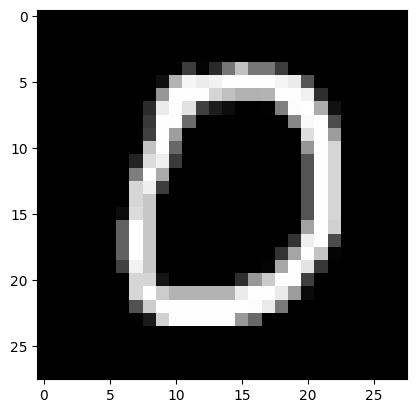

In [13]:
# Original Image
plt.imshow(x_test[10].reshape(28,28), cmap="gray")
plt.show()

In [14]:
# Get Compressed Representation

code = encoder.predict(x_test)      # This code for all the images
code[10].shape                      # This code especially for 10th image

313/313 [==============================] - 1s 2ms/step


(350,)

In [15]:
# De Compress this Representation using Decoder

x_test_reconstructed = decoder.predict(code)

313/313 [==============================] - 1s 3ms/step


In [16]:
x_test_reconstructed[10].shape

(784,)

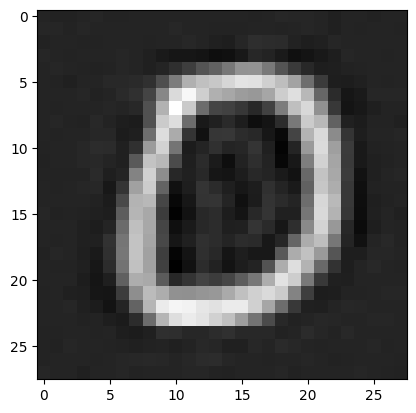

In [17]:
# Reconstructed Image
plt.imshow(x_test_reconstructed[10].reshape(28,28), cmap="gray")
plt.show()

In [ ]:
# Here, we are not using 784 pixels to get reconstructed image. Only using 350 pixels (by compression) to get the reconstructed image.